## **Mount implementation folder in google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd /content/drive/MyDrive/FYP/Implementation/data
! ls

/content/drive/MyDrive/FYP/Implementation/data
ann_backdoors.pkl	OTset.csv		    SVR-predict-data.csv
ann_dos.pkl		preprocessing.csv	    testset.csv
ann_shellcode.pkl	preprosessing-dos.csv	    UNSW-NB15_1.csv
encoded-data.csv	RandomForrest_Analysis.pkl  UNSW-NB15_2.csv
knn_worms.pkl		RandomForrest_Fuzzer.pkl    UNSW-NB15_3.csv
NUSW-NB15_features.csv	selected_columns_all.csv    UNSW-NB15_4.csv


In [3]:
attack_type = 'Exploits'

## **Load balanced training datset for DOS attacks**

Data = (x_train, y_train)

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import shuffle

#get select columns for training
select_col=pd.read_csv("selected_columns_all.csv", sep=',', on_bad_lines='skip', index_col=False)
columns=list(select_col[attack_type])

#create training dataset down sampling
df = pd.read_csv('encoded-data.csv', sep=',', on_bad_lines='skip', index_col=False)
attack_labels = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'] + ['attack_cat','Label']


DoS_attacks = df[df[attack_type] == 1]
Normal_Data = df[df['Label'] == 0]
frames = [DoS_attacks, Normal_Data]
result = pd.concat(frames)
X=result.drop(labels=attack_labels, axis=1)
Y=result[[attack_type]]
X.head()

undersample = RandomUnderSampler(random_state=0)
# fit and apply the transform
X, Y = undersample.fit_resample(X,Y)


x_train,y_train  = shuffle(X[columns],Y)


X_train_DoS_normalized = preprocessing.normalize(x_train)
X_train_DoS_normalized 




array([[8.47712867e-05, 9.06175823e-05, 1.46157391e-05, ...,
        1.91840345e-01, 2.01697199e-09, 3.44931442e-10],
       [0.00000000e+00, 2.85750003e-06, 6.75000007e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.39777335e-05, 5.77003358e-05, 3.72260231e-06, ...,
        3.31311606e-04, 0.00000000e+00, 0.00000000e+00],
       ...,
       [6.58259932e-06, 7.03657169e-06, 1.13493092e-06, ...,
        1.24252237e-03, 1.77503196e-10, 3.60908032e-11],
       [5.13769797e-05, 5.49202196e-05, 8.85809994e-06, ...,
        3.06135934e-03, 1.19584349e-09, 2.30310598e-10],
       [3.18828020e-02, 7.84418145e-03, 6.32595278e-04, ...,
        2.11286823e-01, 5.02723467e-06, 2.03366730e-06]])

## **Create Test Set for DOS attacks**

Data = (x_test_DOS_normalized, y_test)

In [5]:
import pandas as pd
import numpy as np
select_col=pd.read_csv("selected_columns_all.csv", sep=r'\s*,\s*', on_bad_lines='skip', index_col=False)

columns=list(select_col[attack_type])
test_data =pd.read_csv("testset.csv", sep=',', on_bad_lines='skip', index_col=False)
attack_labels = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'] + ['attack_cat','Label']
attack_categories = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'] 

attacks = test_data[test_data['attack_cat'] == attack_type]
# print(DoS_attacks.shape)
Normal_Data = test_data[test_data['Label'] == 0]
# print(Normal_Data.shape)

frames = [attacks, Normal_Data]
result = pd.concat(frames)
X=result.drop(labels=['attack_cat', 'Label'], axis=1)
Y=result[['Label']]
X.head()

x_test,y_test  = shuffle(X[columns],Y)

x_test = x_test.replace('-','')
x_test = x_test.replace(r'^\s*$', np.nan, regex=True)

#delete raws with missing values
for i in x_test.columns.values.tolist():
  i = x_test.loc[x_test[i].isnull()].index
  x_test = x_test.drop(index=list(i))
  y_test = y_test.drop(index=list(i))

percent_missing = x_test.isnull().sum()
missing_value_df = pd.DataFrame({'column_name': x_test.columns, 'count_missing': percent_missing, 'To be dropped': (percent_missing > 45)})
print(missing_value_df)

x_test.head()
#encode the data
from sklearn.preprocessing import LabelEncoder

# replace hex with int
if 'sport' in x_test:
    x_test['sport'] = x_test['sport'].astype(str).apply(int, base=16)
if 'dsport' in x_test:
    x_test['dsport'] = x_test['dsport'].astype(str).apply(int, base=16)

# #Create an instance of Label-encoder
labelencoder = LabelEncoder() 

# # encode columns consists with strings
if 'srcip' in x_test:
    x_test['srcip'] = labelencoder.fit_transform(x_test['srcip'])
if 'dstip' in x_test:
    x_test['dstip'] = labelencoder.fit_transform(x_test['dstip'])
if 'proto' in x_test:
    x_test['proto'] = labelencoder.fit_transform(x_test['proto'])
if 'state' in x_test:
    x_test['state'] = labelencoder.fit_transform(x_test['state'])

X_test_DoS_normalized = preprocessing.normalize(x_test) 


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


                       column_name  count_missing  To be dropped
dttl                          dttl              0          False
sttl                          sttl              0          False
state                        state              0          False
proto                        proto              0          False
swin                          swin              0          False
srcip                        srcip              0          False
ct_dst_sport_ltm  ct_dst_sport_ltm              0          False
dstip                        dstip              0          False
sbytes                      sbytes              0          False
ct_state_ttl          ct_state_ttl              0          False
smeansz                    smeansz              0          False
Sload                        Sload              0          False
dbytes                      dbytes              0          False
tcprtt                      tcprtt              0          False
ackdat                   

**Normalization**

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd

# df=pd.read_csv('filtered-data.csv')
# X=df.drop(labels=['Label'], axis=1)
# # X=df.drop(labels=['attack_cat','Label'], axis=1)
# # Y=df[['attack_cat','Label']]
# Y=df[['Label']]

# # split the dataset
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train_DoS_normalized = preprocessing.normalize(x_train)
X_train_DoS_normalized 
# X_train_normalized = preprocessing.normalize(X_train)
# X_test_normalized = preprocessing.normalize(X_test)

array([[8.47712867e-05, 9.06175823e-05, 1.46157391e-05, ...,
        1.91840345e-01, 2.01697199e-09, 3.44931442e-10],
       [0.00000000e+00, 2.85750003e-06, 6.75000007e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.39777335e-05, 5.77003358e-05, 3.72260231e-06, ...,
        3.31311606e-04, 0.00000000e+00, 0.00000000e+00],
       ...,
       [6.58259932e-06, 7.03657169e-06, 1.13493092e-06, ...,
        1.24252237e-03, 1.77503196e-10, 3.60908032e-11],
       [5.13769797e-05, 5.49202196e-05, 8.85809994e-06, ...,
        3.06135934e-03, 1.19584349e-09, 2.30310598e-10],
       [3.18828020e-02, 7.84418145e-03, 6.32595278e-04, ...,
        2.11286823e-01, 5.02723467e-06, 2.03366730e-06]])

# K nearest neighbours

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

rmse_val = [] #to store rmse values for different k
min = 99999999.999
bestK = -1
for K in range(50):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    x = np.array(X_train_DoS_normalized)
    y = np.array(y_train)

    model.fit(x, y)  #fit the model
    pred=model.predict(X_test_DoS_normalized) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error, ',min = ',min)
    if min > error:
        min = error
        bestK = K


RMSE value for k=  1 is: 0.11199322410191576 ,min =  99999999.999
RMSE value for k=  2 is: 0.11019310036643865 ,min =  0.11199322410191576
RMSE value for k=  3 is: 0.11241554840411856 ,min =  0.11019310036643865
RMSE value for k=  4 is: 0.11562645591811395 ,min =  0.11019310036643865
RMSE value for k=  5 is: 0.11853740210392885 ,min =  0.11019310036643865
RMSE value for k=  6 is: 0.1213565972818458 ,min =  0.11019310036643865
RMSE value for k=  7 is: 0.12417208393690185 ,min =  0.11019310036643865
RMSE value for k=  8 is: 0.12702987544591185 ,min =  0.11019310036643865
RMSE value for k=  9 is: 0.12983728989740673 ,min =  0.11019310036643865
RMSE value for k=  10 is: 0.13240631988881632 ,min =  0.11019310036643865
RMSE value for k=  11 is: 0.1348355436324908 ,min =  0.11019310036643865
RMSE value for k=  12 is: 0.1371766073787409 ,min =  0.11019310036643865
RMSE value for k=  13 is: 0.13932146550565655 ,min =  0.11019310036643865
RMSE value for k=  14 is: 0.14146831816686053 ,min =  0.1

**Finding best K - test set**

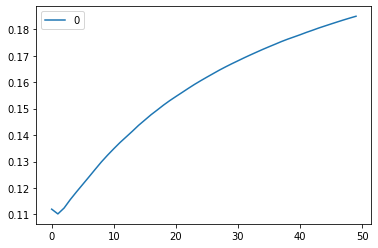

In [ ]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
print('bestK = '+str(bestK))

bestK = 2


**Finding best K - train set**

In [ ]:
# from sklearn import neighbors
# from sklearn.metrics import mean_squared_error 
# from math import sqrt
# import matplotlib.pyplot as plt
# %matplotlib inline

# rmse_val = [] #to store rmse values for different k
# for K in range(50):
#     K = K+1
#     model = neighbors.KNeighborsRegressor(n_neighbors = K)
#     x = np.array(X_train_DoS_normalized)
#     y = np.array(y_train)

#     model.fit(x, y)  #fit the model
#     pred=model.predict(x) #make prediction on test set
#     error = sqrt(mean_squared_error(y,pred)) #calculate rmse
#     rmse_val.append(error) #store rmse values
#     print('RMSE value for k= ' , K , 'is:', error)

In [ ]:
# curve = pd.DataFrame(rmse_val) #elbow curve 
# curve.plot()

In [ ]:
model = neighbors.KNeighborsRegressor(n_neighbors = bestK)
x = np.array(X_train_DoS_normalized)
y = np.array(y_train)
model.fit(x, y)
print(x.shape)
#predict on test set

x_test_array = np.array(X_test_DoS_normalized)
print(x_test_array.shape)
y_test_array = np.array(y_test)
y_pred_test_set = model.predict(x_test_array)

(53586, 15)
(452542, 15)


In [ ]:
from sklearn.metrics import accuracy_score

for i in range(1,100):
  y_predict_class = [1 if p > i/100 else 0 for p in y_pred_test_set]
  print("Accuracy when threshould = ",i/100, round(accuracy_score(y_test_array, y_predict_class), 6))

Accuracy when threshould =  0.01 0.981012
Accuracy when threshould =  0.02 0.981012
Accuracy when threshould =  0.03 0.981012
Accuracy when threshould =  0.04 0.981012
Accuracy when threshould =  0.05 0.981012
Accuracy when threshould =  0.06 0.981012
Accuracy when threshould =  0.07 0.981012
Accuracy when threshould =  0.08 0.981012
Accuracy when threshould =  0.09 0.981012
Accuracy when threshould =  0.1 0.981012
Accuracy when threshould =  0.11 0.981012
Accuracy when threshould =  0.12 0.981012
Accuracy when threshould =  0.13 0.981012
Accuracy when threshould =  0.14 0.981012
Accuracy when threshould =  0.15 0.981012
Accuracy when threshould =  0.16 0.981012
Accuracy when threshould =  0.17 0.981012
Accuracy when threshould =  0.18 0.981012
Accuracy when threshould =  0.19 0.981012
Accuracy when threshould =  0.2 0.981012
Accuracy when threshould =  0.21 0.981012
Accuracy when threshould =  0.22 0.981012
Accuracy when threshould =  0.23 0.981012
Accuracy when threshould =  0.24 0.9

In [ ]:
count =0
for i in y_pred_test_set:
  if i == 1:
    count += 1
count

13037

**confusion matrix**

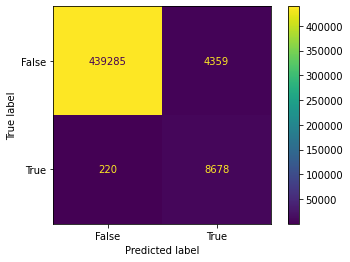

Accuracy when threshould =  0.99 0.989882


In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

threshould =0.99

y_predict_class = [1 if p > threshould else 0 for p in y_pred_test_set]
confusion_matrix = metrics.confusion_matrix(y_test_array, y_predict_class)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 


print("Accuracy when threshould = ",threshould, round(accuracy_score(y_test_array, y_predict_class), 6))

# Saving Machine Learning Model

In [8]:
from sklearn import neighbors
from joblib import Parallel, delayed
import joblib

knn = neighbors.KNeighborsRegressor(n_neighbors = 2)

# train model
x = np.array(X_train_DoS_normalized)
y = np.array(y_train)

knn.fit(x, y)  #fit the model

# Save the model as a pickle in a file
joblib.dump(knn, 'knn_exploits.pkl')

# Load the model from the file
knn_from_joblib = joblib.load('knn_exploits.pkl')

# Use the loaded model to make predictions
x_test_array = np.array(X_test_DoS_normalized)
y_test_array = np.array(y_test)
y_pred_test_set = knn_from_joblib.predict(x_test_array)

In [9]:
count =0
for i in y_pred_test_set:
  if i == 1:
    count += 1
count

13037